# 빗물 트래핑

- 높이를 입력 받아 비 온 후 얼마나 많은 물이 쌓일 수 있는지 계산하라.

- 입력

```python
[0,1,0,2,1,0,1,3,2,1,2,1]
```

- 출력
```python
6
```

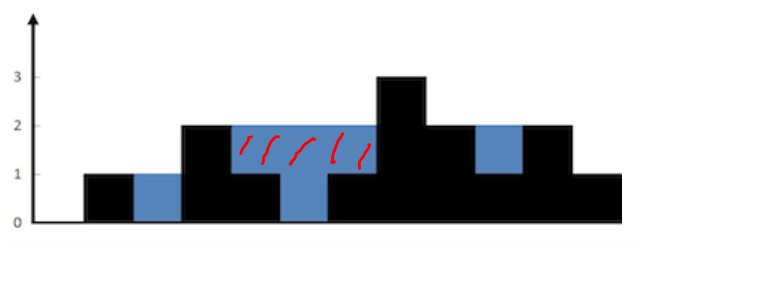

if not height는 주어진 리스트 height가 비어 있거나 값이 없는 경우를 검사하는 조건문입니다.

리스트가 비어 있으면 조건은 True로 평가됩니다. 또는 리스트에 요소가 있더라도 모든 요소가 0이거나 False로 평가되는 경우에도 조건은 True가 됩니다. 즉, height 리스트가 비어 있거나 모든 요소가 0이거나 False로 평가되면 조건문은 True가 됩니다.

그렇지 않은 경우, 즉 height 리스트에 요소가 하나 이상 있고 모든 요소가 0 또는 False가 아닌 값으로 평가되면 조건문은 False가 됩니다.

```python
height = []
if not height:
    print("height 리스트가 비어 있습니다.")
else:
    print("height 리스트가 비어 있지 않습니다.")
```

- 가장 높이가 높은 막대를 한번 살펴보자. 이 그림에서 최대 높이는 3이지만 100이어도 관계는 없다. 막대는 높고 낮음에 무관하게, 전체 부피에 영향을 끼치지 않으면서 그저 왼쪽과 오른쪽을 가르는 장벽 역할을 한다.

```python
 volume += left_max - height[left] , volume += right_max - height[right]
```

- 이처럼 최대 높이의 막대까지 각각 좌우 기둥 최대 높이 left_max, right_max 가 현재 높이와의 차이만큼 물 높이 volume 을 더해 나간다.

```python
if left_max <= right_max:
    volume += left_max - height[left]
    left += 1
else: 
    volume += right_max - height[right]
    right -= 1
```

- 이 경우 적어도 낮은 쪽은 그만큼 항상 채워질 것이기 때문에 좌우 어느 쪽이든 낮은 쪽은 높은 쪽을 향해서 포인트가 가운데로 점점 이동한다. 오른쪽이 크다면 left += 1 로 왼쪽이 이동하고 그렇지 않다면(즉 왼쪽이 크다면) right -= 1 로 오른쪽이 이동한다.

- 이렇게 하면 가장 높이가 높은 막대, 즉 최대 지점에서 좌우포인터가 서로 만나게 되며 O(n)에 풀이가 가능하다.

In [8]:
# 풀이 1. 투 포인터를 최대로 이동

data = [0,1,0,2,1,0,1,3,2,1,2,1]

from typing import List

def trap(height: List[int]) -> int:
    if not height:
        return 0 
    volume = 0
    left, right = 0, len(height) - 1
    left_max, right_max = height[left], height[right]
    while left < right:
        left_max = max(left_max, height[left])
        right_max = max(right_max, height[right])
        # 더 높은 쪽을 향해 투포인터 이동
        if left_max <= right_max:
            volume += left_max - height[left]
            left += 1
        else:
            volume += right_max - height[right]
            right -= 1
    return volume

In [9]:
trap(data)

6

1. 스택에 쌓아 나가면서 현재 높이가 이전 높이보다 높을 때, 즉 꺾이는 부분 변곡점을 기준으로 격차만큼 물 높이 volume 을 채운다.
2. 이전 높이는 고정된 형태가 아니라 들쑥날쑥하기 때문에, 계속 스택으로 채워 나가다가 변곡점을 만날 때마다 스택에서 하나씩 꺼내면서 이전과의 차이만큼 물 높이를 채워 나간다.
3. 스택으로 이전 항목들을 되돌아보며 체크하기는 하지만, 한번만 살펴보기 때문에 마찬가지로 O(n)에 풀이가 가능하다.

In [2]:
# 풀이 2. 스택 쌓기
from typing import List

data = [0,1,0,2,1,0,1,3,2,1,2,1]

def trap(height: List[int]) -> int:
    stack = []
    volume = 0 

    for i in range(len(height)):
        # 변곡점(현재 높이가 이전 높이보다 높을 때)을 만나는 경우
        while stack and height[i] > height[stack[-1]]:
            # 스택에서 꺼낸다.
            top = stack.pop()
            if not len(stack):
                break
            # 이전과의 차이만큼 물 높이 처리
            distance = i - 1 - stack[-1]
            waters = min(height[i], height[stack[-1]], height[top])
            volume += distance * waters

        stack.append(i)
    return volume

trap(data)

6

1. data 리스트에 높이 데이터가 주어졌습니다.

2. trap 함수가 정의되었습니다. 이 함수는 List[int] 형식의 height 파라미터를 받고, 정수형 값을 반환합니다.

3. stack 리스트와 volume 변수를 초기화합니다. stack은 스택으로 사용되며, volume은 담길 수 있는 물의 양을 나타냅니다.

4. for 루프를 사용하여 height 리스트의 각 요소에 대해 반복합니다. 변수 i는 인덱스를 나타냅니다.

5. 현재 높이 height[i]가 스택의 맨 위에 있는 높이보다 크다면, 변곡점을 만난 것입니다. while 루프를 사용하여 스택이 비어 있지 않고, height[i]가 스택의 맨 위에 있는 높이보다 큰 동안 반복합니다.

6. while 루프 내부에서는 스택에서 요소를 하나씩 꺼내고 처리합니다. top 변수에는 꺼낸 요소의 인덱스가 저장됩니다.

7. 스택이 비어있지 않으면, 즉 변곡점 이전에 더 큰 높이의 기둥이 있는 경우에는 다음 작업을 수행합니다.

8. 변곡점까지의 거리(distance)를 계산합니다. i는 현재 인덱스이고, stack[-1]은 스택의 맨 위 요소의 인덱스입니다. 따라서 distance는 i - 1 - stack[-1]로 계산됩니다.

9. 변곡점 이전과 이후의 높이 중 가장 낮은 값(waters)을 찾습니다. height[i]는 현재 높이, height[stack[-1]]은 스택의 맨 위 요소의 높이, height[top]은 꺼낸 요소의 높이입니다. 이 세 값 중 가장 낮은 값이 실제로 담길 수 있는 물의 높이가 됩니다.

10. 담길 수 있는 물의 양은 distance와 waters를 곱하여 누적합니다. 이는 담길 수 있는 직사각형 영역의 넓이를 나타냅니다.

11. 현재 인덱스 i를 스택에 추가합니다.

12. for 루프가 종료되고, 최종적인 물의 양인 volume을 반환합니다.

13. trap(data)를 호출하여 주어진 높이 데이터에 대한 물의 양을 계산합니다. 이 값은 반환되어 출력됩니다.

1. height list = [0,1,0,2,1,0,1,3,2,1,2,1]
2. i = 0 -> while 조건문을 충족하지 못하므로 곧바로 stack = 0 이 저장됨
3. i = 1 -> stack[0] and height[1] = 1 이다. 앞이 빈 리스트가 아니므로 True를 반환하고, 두번쨰 피연산자인 height[1] 을 return 한다. 1>0 이므로 반복문이 작동한다.
4. i = 1 -> top 에서 0을 빼내고, stack 이 empty 해졌으므로 break 하고 stack 에 1을 넣는다.
5. i = 2 -> 0 > 1 이 성립하지 않아 바로 i 를 더한다. stack = [1, 2] 이 된다.
6. i = 3 -> height[3]=2 >  height[stack[-1]] = height[2] = 0 이 성립한다. 2를 pop 해내고, stack 이 차 있으므로 distance 를 계산한다.
7. distance = 3 - 1 - 1 = 1 이다. stack 에서 이미 2를 빼냈으므로, stack은 1만이 남아있다. stack[-1]= 1 이 되고 이것은 현재 위치와 스택의 맨 위에 있는 인덱스 사이의 거리가 된다. (왜 -1을 추가로 하냐면, 벽의 너비 역시 계산해줘야 하기 때문이다.)
8. 이제 인덱스 3과 인덱스 7 사이의 물을 계산해보자...ㅅㅂ..

    - 우선 앞에서 스택을 다 소비했고 인덱스 3만 스택에 들어있는 상황.

    - 인덱스 4, 인덱스 5 모두 이전 높이보다 낮아서 아무것도 못하고 스택에 저장됨..

    - 인덱스 6에서 드디어 이전 높이보다 높다.

    - 그럼 인덱스 5를 top에 할당하고

    - 스택에 젤 마지막에 저장된 인덱스 4와 인덱스 6의 거리를 생각하면 1,

    - 두 인덱스의 최소 높이는 1이고 height [top]은 0이므로 거리*높이=1이 된다.
    
    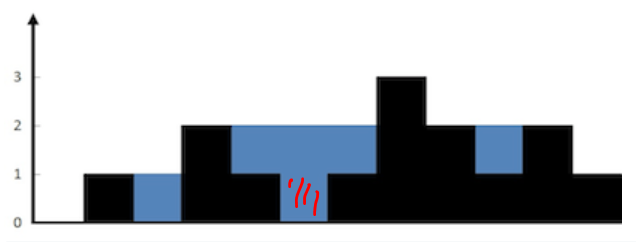

    - 스택에는 인덱스 3,4 그리고 6이 쌓여있고 다음 인덱스 7은 이전보다 높다!

    - 따라서 인덱스 6이 top에 할당되고 인덱스 4와 인덱스 7의 최소 높이는 1, 거리는 3이니까 거리*높이=3이 된다.

    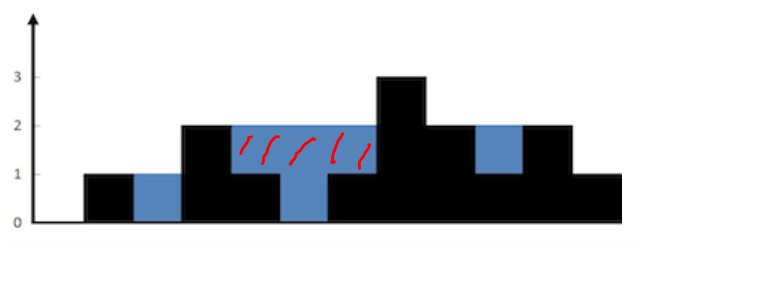

In [5]:
a = [0]
print(a and data[3]) # 두 개가 모두 논리값일 때는 논리값을 반환하지만, 
# 앞이 빈 리스트가 아니므로 True 를 반환하고, 앞이 True 이므로 뒤의 값은 두번째 피연산자 그 자체를 반환하여 리스트의 원소를 반환한다. 
# 따라서 결과값은 2가 된다.

2


In [7]:
b = [1,2]
print(b and data[3]) # data[2] 는 0이므로 True and False 가 되어 

2
